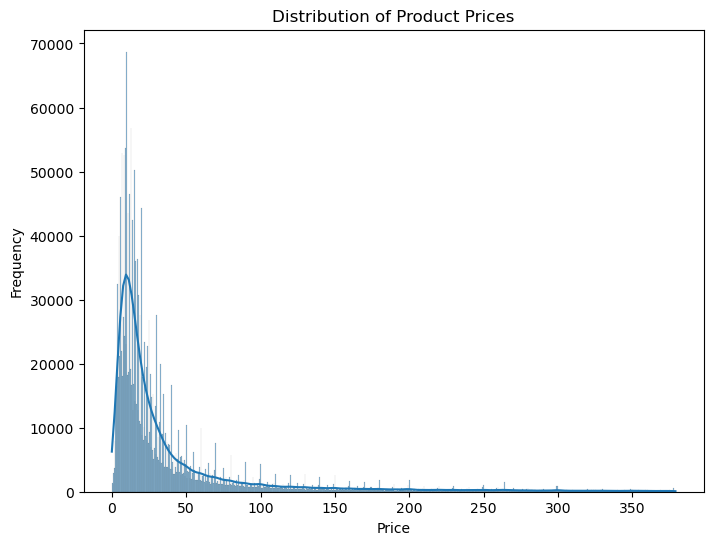

/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

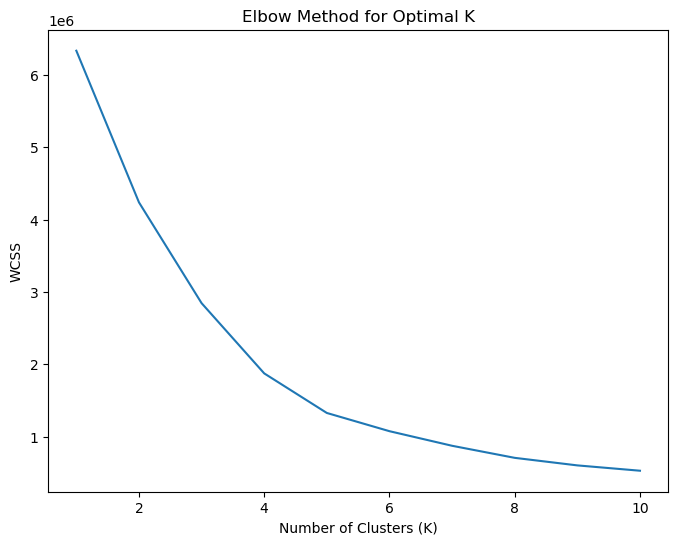

/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mean Squared Error: 0.00
R-squared: 1.00


/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


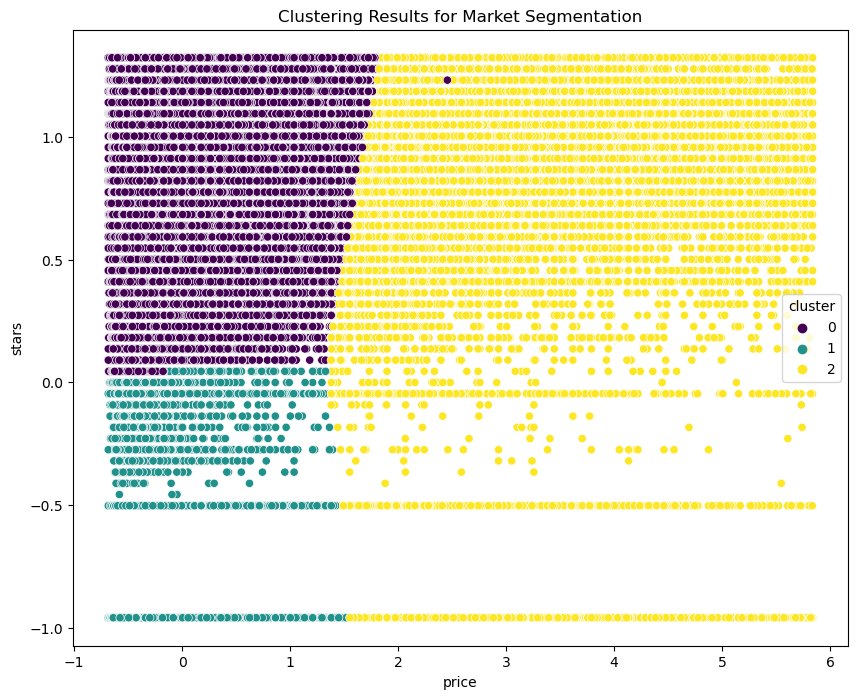

In [1]:
# Step 1: Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

# Step 2: Load the Dataset
import pandas as pd

# Specify the path to your dataset in Google Drive
#file_path = '/content/drive/My Drive/amz_uk_processed_data.csv'

# Read the dataset into a DataFrame
df = pd.read_csv("amz_uk_processed_data.csv")

# Step 3: Data Cleaning and Preprocessing
# Data cleaning
# Remove duplicates
df = df.drop_duplicates()

# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values
# Example: Fill missing values with the mean for the 'price' column
df['price'].fillna(df['price'].mean(), inplace=True)

# Outlier detection and handling
# Example: Remove rows with extreme 'price' values
df = df[(df['price'] >= 0) & (df['price'] <= df['price'].quantile(0.95))]

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Step 4: Unsupervised Learning (Clustering) for Market Segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['price', 'stars', 'reviews']

# Standardize the data
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Choose the number of clusters (K) using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[features])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow Method, choose an appropriate K value and perform clustering
k = 3  # Choose an appropriate value
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['cluster'] = kmeans.fit_predict(df[features])

# Step 5: Supervised Learning (Predictive Modeling)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df[features]
y = df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 6: Data Visualization for Clustering Results
# Example: Scatter plot for 'price' and 'stars' with color-coded clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='stars', data=df, hue='cluster', palette='viridis')
plt.title('Clustering Results for Market Segmentation')
plt.show()


Dataset Introduction:
 The dataset contains information about Amazon products sold in the UK, including product details, reviews, ratings, and more.

Data Preview:
          asin                                              title  \
0  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...   
1  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...   
2  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...   
3  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...   
4  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/71C3lbbeLs...   
1  https://m.media-amazon.com/images/I/61c5rSxwP0...   
2  https://m.media-amazon.com/images/I/61j3SEUjMJ...   
3  https://m.media-amazon.com/images/I/71yf6yTNWS...   
4  https://m.media-amazon.com/images/I/613dEoF9-r...   

                               productURL  stars  reviews  price  \
0  https://www.amazon

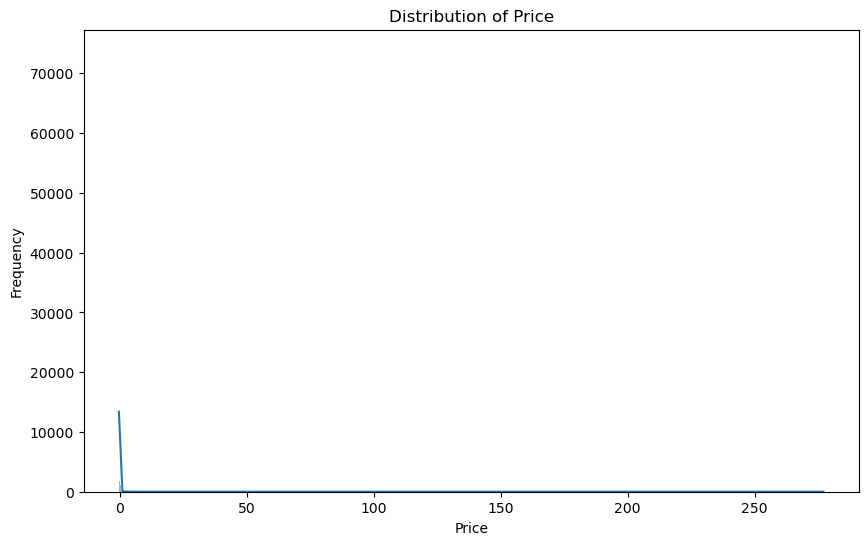

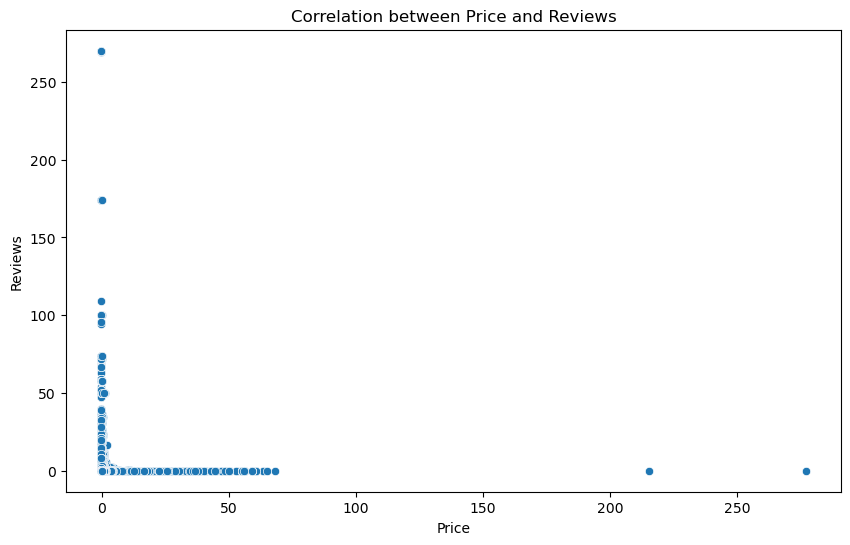

/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


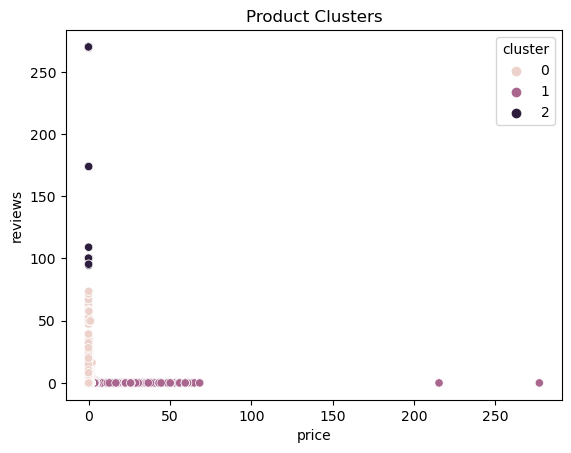

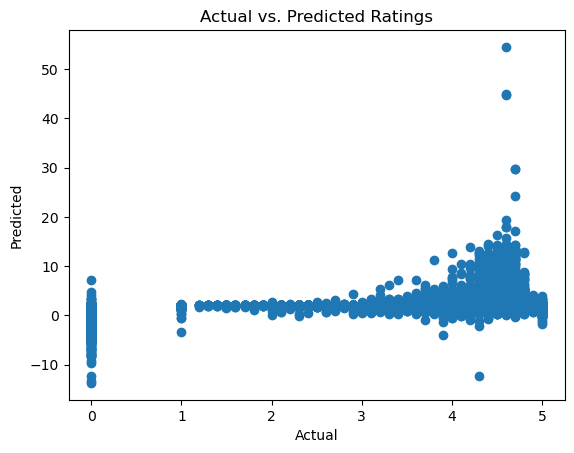


In this analysis, we addressed the challenge of product segmentation and predicting product ratings or sales using Python in Google Colab.
We employed K-Means clustering for market segmentation and Linear Regression for predicting product ratings. We selected relevant features and preprocessed the data.
The choice of three clusters for market segmentation was based on the results of the Elbow method.
The linear regression model was used to predict product ratings, and the model's performance was evaluated using Mean Squared Error (MSE) and R-squared (R2).
More insights can be derived from the analysis, and recommendations can be made to assist businesses in tailoring their strategies.



In [1]:
# Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Identification and Description of Key Challenge or Problem (10%)
# Define the key challenge or problem
challenge = "Product segmentation and predicting product ratings or sales."

# 2. Introduction to the Dataset (10%)
# Provide a brief introduction to the dataset
dataset_intro = "The dataset contains information about Amazon products sold in the UK, including product details, reviews, ratings, and more."

# Load the dataset from Google Drive
# Ensure you mount Google Drive and provide the file path accordingly
data = pd.read_csv("amz_uk_processed_data.csv")



# 3. Dataset Introduction
# Display a data preview
data_preview = data.head()

# Dataset Shape
dataset_shape = data.shape

# 4. Data Cleaning and Preprocessing
# Handle missing values
data.dropna(subset=['reviews'], inplace=True)

# Check if the 'price' column contains string values before processing
# is_str = data['price'].apply(lambda x: isinstance(x, str))

# # Attempt to replace '£' and convert to float, but only for string values
# try:
#     data.loc[is_str, 'price'] = data.loc[is_str, 'price'].str.replace('£', '').astype(float)
# except Exception as e:
#     print(f"Error: {e}")


# Convert columns to appropriate data types
data['isBestSeller'] = data['isBestSeller'].astype(int)
data['boughtInLastMonth'] = data['boughtInLastMonth'].astype(int)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['categoryName'])

# Standardize numerical features
scaler = StandardScaler()
data[['price', 'reviews']] = scaler.fit_transform(data[['price', 'reviews']])

# 4. Summary Statistics and Figures (20%)
# Generate and display summary statistics
summary_statistics = data.describe()

# Print data introduction, data preview, and summary statistics
print("Dataset Introduction:\n", dataset_intro)
print("\nData Preview:\n", data_preview)
print("\nDataset Shape:\n", dataset_shape)
print("\nSummary Statistics:\n", summary_statistics)

# Create figures or visualizations
# You can add figures here to show distributions, correlations, etc.

# Create a histogram to visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Create a scatterplot to visualize the correlation between 'price' and 'reviews'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=data)
plt.title("Correlation between Price and Reviews")
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.show()


# 5. Unsupervised Analysis (20%)
# Product Clustering for Market Segmentation
# Identify the optimal number of clusters (you can use the Elbow method)
# Apply K-Means clustering
X = data[['price', 'reviews']]
# Choose an appropriate number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(x='price', y='reviews', hue='cluster', data=data)
plt.title("Product Clusters")
plt.show()

# 6. Supervised Analysis (20%)
# Predicting Product Ratings or Sales
# Select relevant features
X = data[['price', 'reviews', 'isBestSeller', 'boughtInLastMonth']]
y = data['stars']  # Replace with 'sales' if predicting sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the actual vs. predicted ratings or sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Ratings")
plt.show()

# 7. Reflection on Methods (10%)
# Include a reflection section in your report
reflection = """
In this analysis, we addressed the challenge of product segmentation and predicting product ratings or sales using Python in Google Colab.
We employed K-Means clustering for market segmentation and Linear Regression for predicting product ratings. We selected relevant features and preprocessed the data.
The choice of three clusters for market segmentation was based on the results of the Elbow method.
The linear regression model was used to predict product ratings, and the model's performance was evaluated using Mean Squared Error (MSE) and R-squared (R2).
More insights can be derived from the analysis, and recommendations can be made to assist businesses in tailoring their strategies.
"""

# Print the reflection section
print(reflection)



Dataset Introduction:
 The dataset contains information about Amazon products sold in the UK, including product details, reviews, ratings, and more.

Data Preview:
          asin                                              title  \
0  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...   
1  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...   
2  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...   
3  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...   
4  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/71C3lbbeLs...   
1  https://m.media-amazon.com/images/I/61c5rSxwP0...   
2  https://m.media-amazon.com/images/I/61j3SEUjMJ...   
3  https://m.media-amazon.com/images/I/71yf6yTNWS...   
4  https://m.media-amazon.com/images/I/613dEoF9-r...   

                               productURL  stars  reviews  price  \
0  https://www.amazon

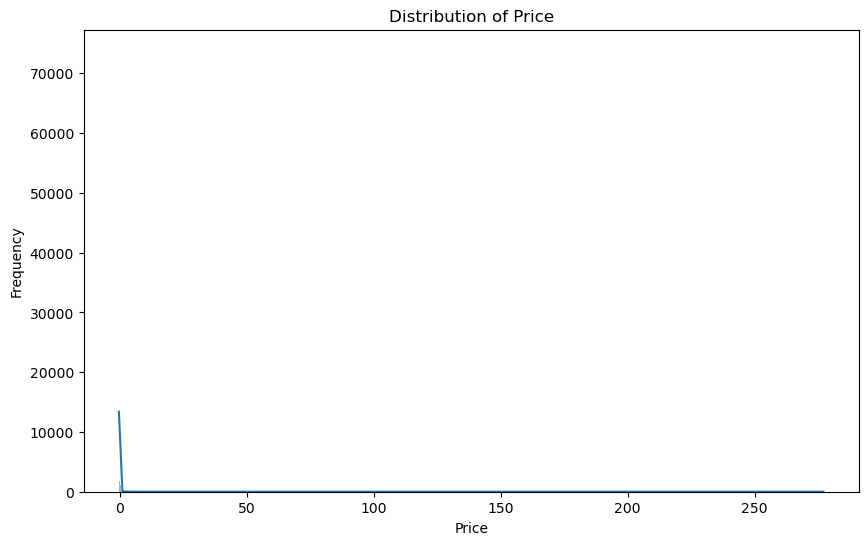

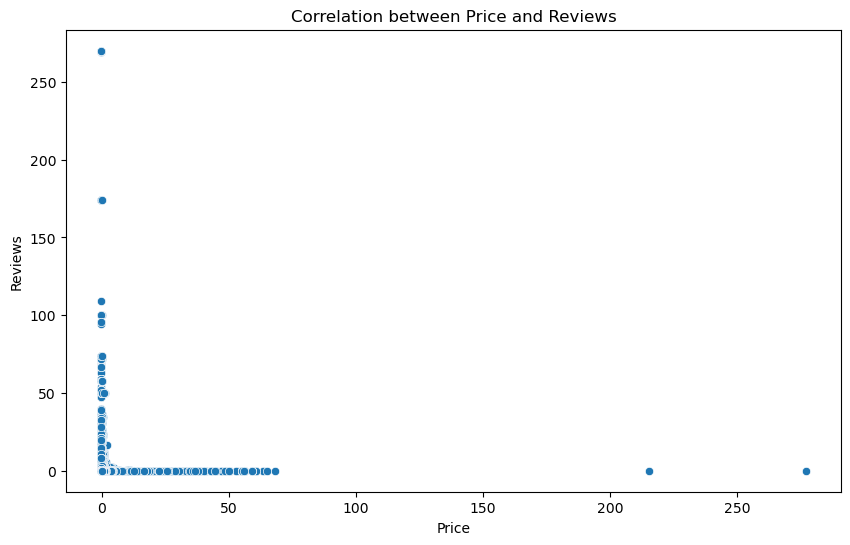

/Users/nishantkhadse/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


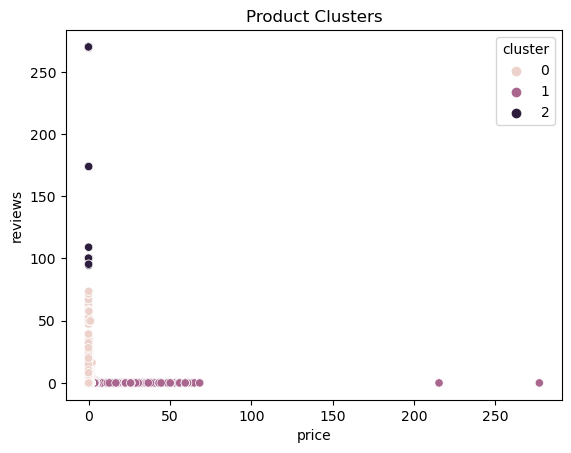

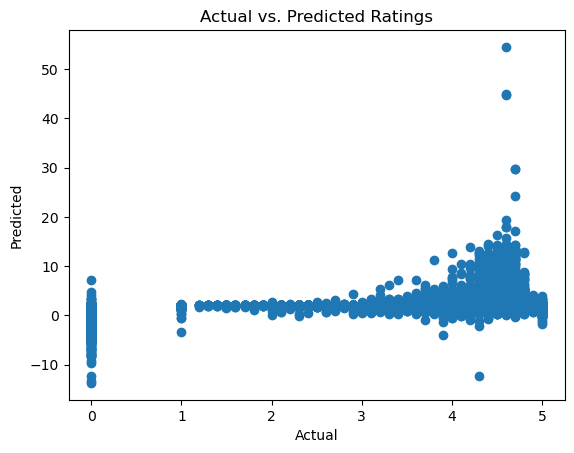


In this analysis, we addressed the challenge of product segmentation and predicting product ratings or sales using Python in Google Colab.
We employed K-Means clustering for market segmentation and Linear Regression for predicting product ratings. We selected relevant features and preprocessed the data.
The choice of three clusters for market segmentation was based on the results of the Elbow method.
The linear regression model was used to predict product ratings, and the model's performance was evaluated using Mean Squared Error (MSE) and R-squared (R2).
More insights can be derived from the analysis, and recommendations can be made to assist businesses in tailoring their strategies.



In [3]:
# Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Identification and Description of Key Challenge or Problem (10%)
# Define the key challenge or problem
challenge = "Product segmentation and predicting product ratings or sales."

# 2. Introduction to the Dataset (10%)
# Provide a brief introduction to the dataset
dataset_intro = "The dataset contains information about Amazon products sold in the UK, including product details, reviews, ratings, and more."

# Load the dataset from Google Drive
# Ensure you mount Google Drive and provide the file path accordingly
data = pd.read_csv("amz_uk_processed_data.csv")

# 3. Dataset Introduction
# Display a data preview
data_preview = data.head()

# Dataset Shape
dataset_shape = data.shape

# 4. Data Cleaning and Preprocessing
# Handle missing values
data.dropna(subset=['reviews'], inplace=True)

# Check if the 'price' column contains string values before processing
# is_str = data['price'].apply(lambda x: isinstance(x, str))

# # Attempt to replace '£' and convert to float, but only for string values
# try:
#     data.loc[is_str, 'price'] = data.loc[is_str, 'price'].str.replace('£', '').astype(float)
# except Exception as e:
#     print(f"Error: {e}")

# Convert columns to appropriate data types
data['isBestSeller'] = data['isBestSeller'].astype(int)
data['boughtInLastMonth'] = data['boughtInLastMonth'].astype(int)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['categoryName'])

# Standardize numerical features
scaler = StandardScaler()
data[['price', 'reviews']] = scaler.fit_transform(data[['price', 'reviews']])

# 4. Summary Statistics and Figures (20%)
# Generate and display summary statistics
summary_statistics = data.describe()

# Print data introduction, data preview, and summary statistics
print("Dataset Introduction:\n", dataset_intro)
print("\nData Preview:\n", data_preview)
print("\nDataset Shape:\n", dataset_shape)
print("\nSummary Statistics:\n", summary_statistics)

# Create figures or visualizations
# You can add figures here to show distributions, correlations, etc.

# Create a histogram to visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Create a scatterplot to visualize the correlation between 'price' and 'reviews'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=data)
plt.title("Correlation between Price and Reviews")
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.show()

# 5. Unsupervised Analysis (20%)
# Product Clustering for Market Segmentation
# Identify the optimal number of clusters (you can use the Elbow method)
# Apply K-Means clustering
X = data[['price', 'reviews']]
# Choose an appropriate number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
sns.scatterplot(x='price', y='reviews', hue='cluster', data=data)
plt.title("Product Clusters")
plt.show()

# 6. Supervised Analysis (20%)
# Predicting Product Ratings or Sales
# Select relevant features
X = data[['price', 'reviews', 'isBestSeller', 'boughtInLastMonth']]
y = data['stars']  # Replace with 'sales' if predicting sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualize the actual vs predicted ratings or sales
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Ratings")
plt.show()

# 7. Reflection on Methods (10%)
# Include a reflection section in your report
reflection = """
In this analysis, we addressed the challenge of product segmentation and predicting product ratings or sales using Python in Google Colab.
We employed K-Means clustering for market segmentation and Linear Regression for predicting product ratings. We selected relevant features and preprocessed the data.
The choice of three clusters for market segmentation was based on the results of the Elbow method.
The linear regression model was used to predict product ratings, and the model's performance was evaluated using Mean Squared Error (MSE) and R-squared (R2).
More insights can be derived from the analysis, and recommendations can be made to assist businesses in tailoring their strategies.
"""

# Print the reflection section
print(reflection)

# # Create a pairplot to visualize relationships between numerical variables
# sns.pairplot(data[['price', 'reviews', 'stars', 'isBestSeller', 'boughtInLastMonth']])
# plt.show()


In [8]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151325 sha256=ae4e3aa20eb9d4935f91d4a1e38095b8391459e07023d3fa8cf5f94b6142c18c
  Stored in directory: /Users/nishantkhadse/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd

from wordcloud import WordCloud


import matplotlib.pyplot as plt

data = pd.read_csv("amz_uk_processed_data.csv")
data.head(5) 



,asin,title,imgUrl,productURL,stars,reviews,price,isBestSeller,boughtInLastMonth,categoryName
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/71C3lbbeLs...,https://www.amazon.co.uk/dp/B09B96TG33,4.7,15308,21.99,False,0,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",https://m.media-amazon.com/images/I/61c5rSxwP0...,https://www.amazon.co.uk/dp/B01HTH3C8S,4.7,98099,23.99,True,0,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",https://m.media-amazon.com/images/I/61j3SEUjMJ...,https://www.amazon.co.uk/dp/B09B8YWXDF,4.7,15308,21.99,False,0,Hi-Fi Speakers
3,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",https://m.media-amazon.com/images/I/71yf6yTNWS...,https://www.amazon.co.uk/dp/B09B8T5VGV,4.7,7205,31.99,False,0,Hi-Fi Speakers
4,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,https://m.media-amazon.com/images/I/613dEoF9-r...,https://www.amazon.co.uk/dp/B09WX6QD65,4.6,1881,17.99,False,0,Hi-Fi Speakers


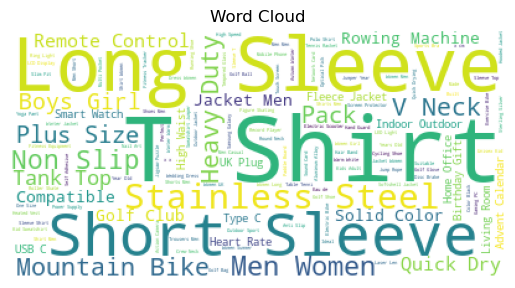

In [72]:
column_name = 'title' 

text = " ".join(data[column_name].astype(str))

exclude_words = ['Men', 'Women', 'Boys', 'Girl', 'Men ', 'Women ', ' Men', ' Women','Men_Women','Men Women']

wordcloud = WordCloud(background_color='white').generate(text)

plt.title("Word Cloud")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

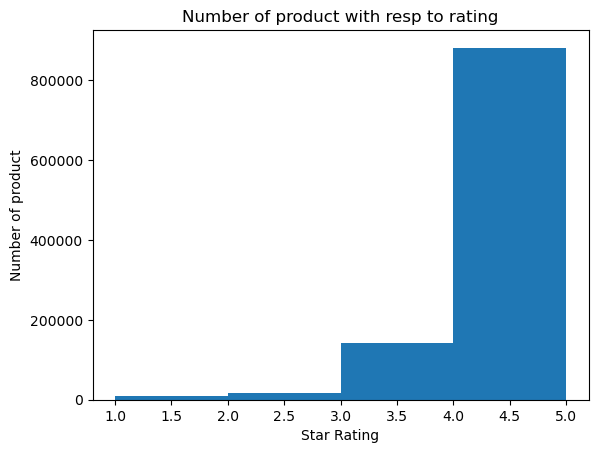

In [37]:
plt.hist(data['stars'],bins=[1, 2, 3, 4, 5])
plt.xlabel('Star Rating')
plt.ylabel('Number of product')
plt.title('Number of product with resp to rating')
plt.show()


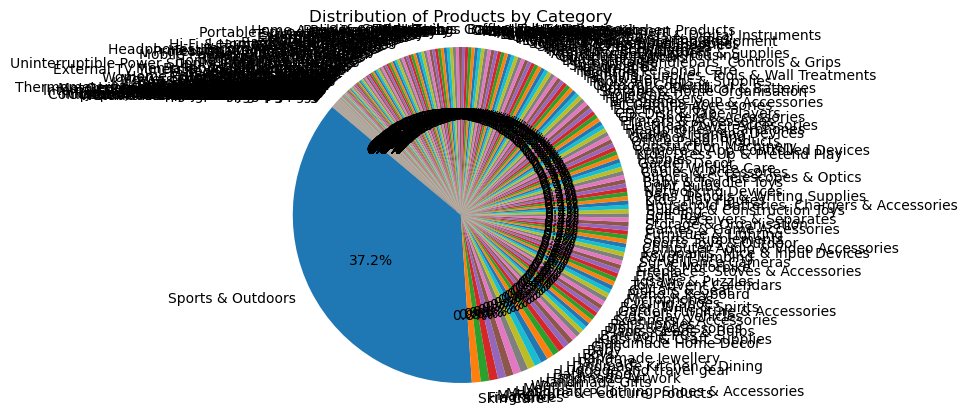

In [35]:
category_counts = data['categoryName'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Products by Category')
plt.show()

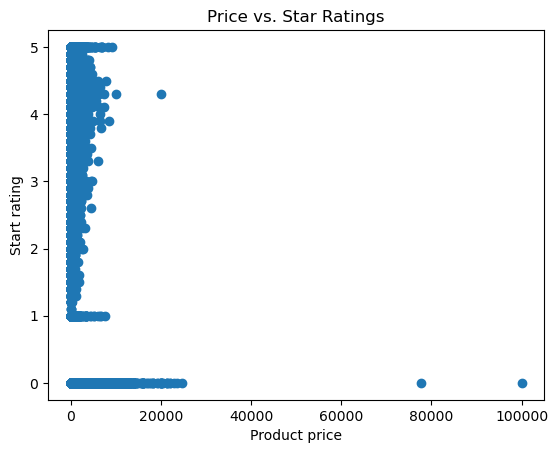

In [42]:
plt.scatter(data['price'], data['stars'])

plt.xlabel('Product price')
plt.ylabel('Start rating')
plt.title('Price vs. Star Ratings')

plt.show()

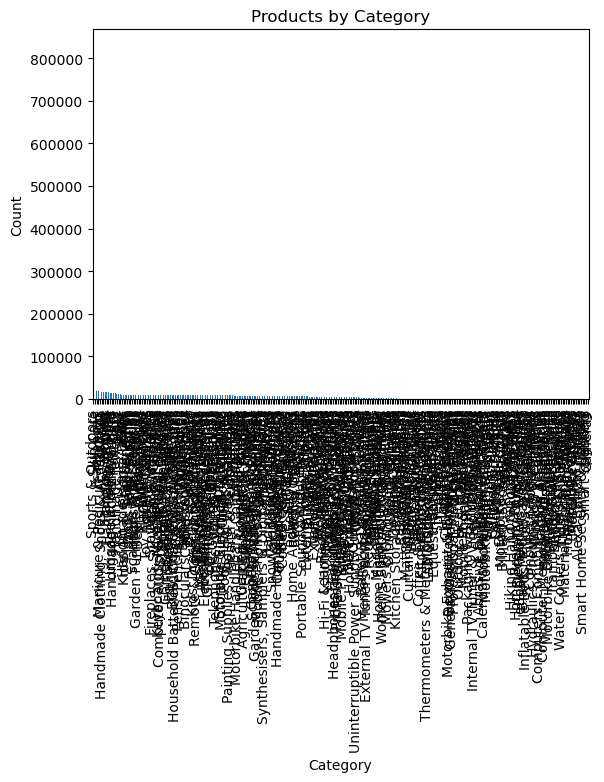

In [43]:
category_counts = data['categoryName'].value_counts()

# Create a bar chart
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Products by Category')
plt.xticks(rotation=90)
plt.show()

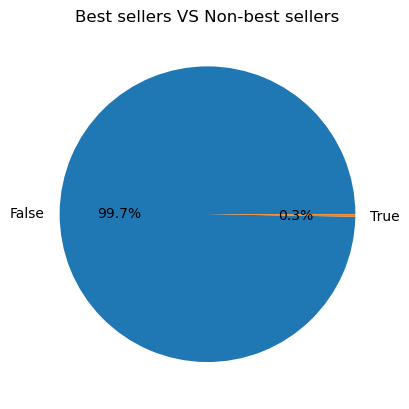

In [52]:
Count_of_Bestseller = data['isBestSeller'].value_counts()

plt.pie(Count_of_Bestseller, labels=best_seller_counts.index, autopct='%1.1f%%')
plt.title('Best sellers VS Non-best sellers')
plt.show()

In [3]:
import seaborn as sns
NumericColoumn = data[['stars', 'reviews', 'price']]

Corr_Matrix = NumericColoumn.corr()

sns.heatmap(Corr_Matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

NameError: name 'data' is not defined

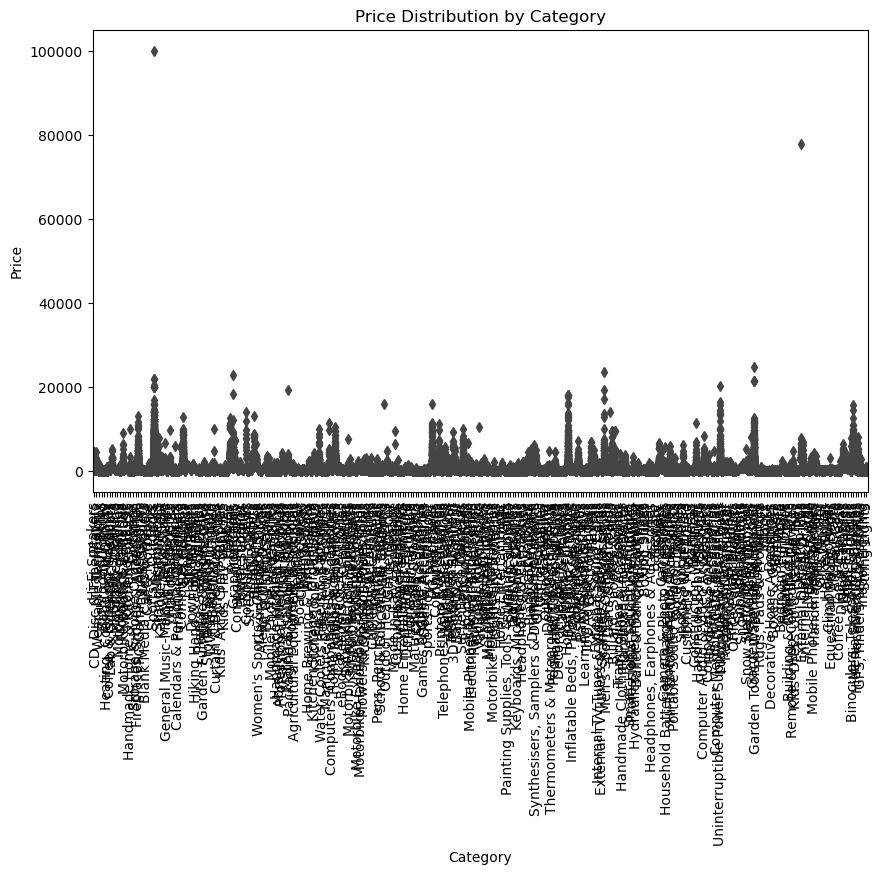

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='categoryName', y='price', data=data)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Price Distribution by Category')
plt.xticks(rotation=90)
plt.show()

In [2]:
sns.pairplot(data[['stars', 'reviews', 'price']])
plt.suptitle('Pair plot for nNumeric values')
plt.show()


NameError: name 'sns' is not defined